# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib as plt
import math


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [5]:
def roll_dice(n):
    dice = [1,2,3,4,5,6]
    return pd.DataFrame(random.choices(dice, k=n),columns=['dice'])

#### 2.- Plot the results sorted by value.

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,dice
0,4
1,5
2,5
3,6
4,6
5,4
6,1
7,5
8,6
9,1


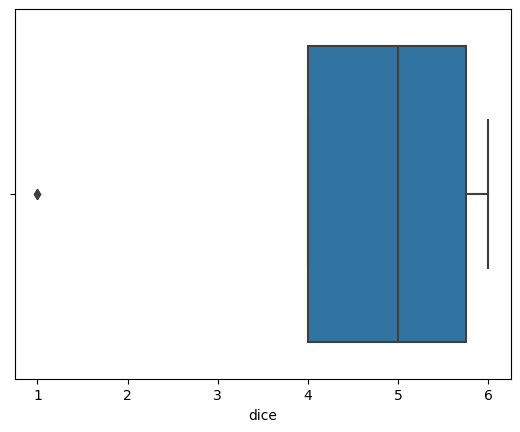

In [6]:
dice = roll_dice(10)
sns.boxplot(x=dice['dice'].sort_values())
dice


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [7]:
freq_dist = dice.value_counts()
type(freq_dist)

pandas.core.series.Series

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

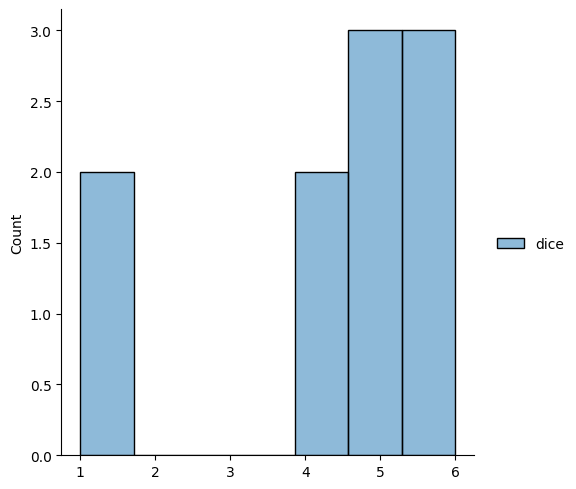

In [8]:
sns.displot(dice,bins=7)

To be honest the only way that I know to plot a data_frame that stores 10 occurances of dice rollings, is histogram. Since we were not supposed to use histplot for the first question(becuase it was asked in the 2nd question), I went with boxplot. I hope it's not wrong.
Anyway, comparing these two plots, we can see that 4 is the nearest number to the mean, however the frequency dist., shows that 4 never faced up.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
dice = roll_dice(5)
dice

,dice
0,4
1,2
2,2
3,6
4,1


In [10]:
def cal_mean(dt):
    sum = 0
    for i in range(len(dt)):
        sum += dt.iloc[i]
    return round(sum/len(dt),2)

cal_mean(dice)


dice    3.0
Name: 0, dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
def freq_dist_cal(dt):
    freq_dist = dt.value_counts()
    total = 0
    for i in range(len(freq_dist)):
        total += freq_dist.index[i][0] * freq_dist.values[i]
    return round(total/sum(freq_dist.values), 2)

freq_dist_cal(dice)
    

3.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
def cal_median(dt):
    dt.sort_values(by=['dice'], inplace=True)
    if len(dt)%2 ==0:
        return round((dt.iloc[int(len(dt)/2)].item() + dt.iloc[int((len(dt) /2)-1)].item())/2,2), int(len(dt)/2 -1)
    else:
        return dt.iloc[math.floor(len(dt)/2)].item(), math.floor(len(dt)/2)

cal_median(dice)

(2, 2)

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
def cal_quartile(dt):
    second = cal_median(dt)
    if len(dt)%2 ==0:
        first = cal_median(dt.iloc[:second[1]+1])
        third = cal_median(dt.iloc[second[1]+1:])
    else:
        first = cal_median(dt.iloc[:second[1]])
        third = cal_median(dt.iloc[second[1]+1:])

    return [first[0], second[0], third[0]]

cal_quartile(dice)


    

C:\Users\aha93\AppData\Local\Temp\ipykernel_20584\3170279149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.sort_values(by=['dice'], inplace=True)


[1.5, 2, 5.0]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [14]:
dice_rolled = pd.read_csv(r'D:\IronHack\labs\Discriptive Stats\Discreptive\Descriptive-Stats\data\roll_the_dice_hundred.csv')
dice_rolled.sort_values(by=['value'], inplace=True, ignore_index=True)
dice_rolled

,Unnamed: 0,roll,value
0,0,0,1
1,47,47,1
2,56,56,1
3,9,9,1
4,73,73,1
...,...,...,...
95,17,17,6
96,11,11,6
97,24,24,6
98,21,21,6


C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='value', ylabel='Count'>

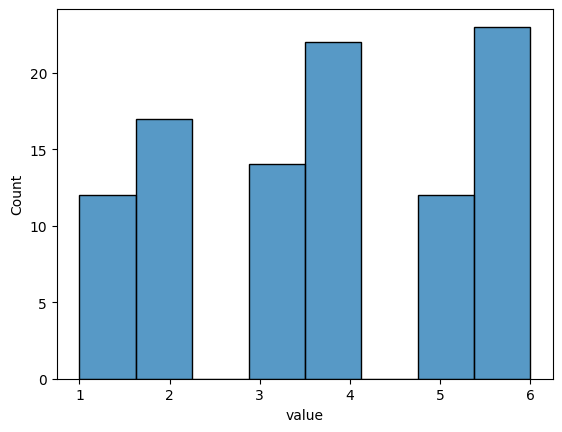

In [15]:
sns.histplot(dice_rolled,x='value')

It seems like sinusoidal pattern, which is wierd, since the probability of any each occurrance of rolling a dice is independent and equaly the same.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [16]:
dice_rolled_sliced = pd.DataFrame(dice_rolled['value'])
cal_mean(dice_rolled_sliced)

value    3.74
Name: 0, dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [17]:
freq_dist_cal(dice_rolled_sliced)

3.74

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='value', ylabel='Count'>

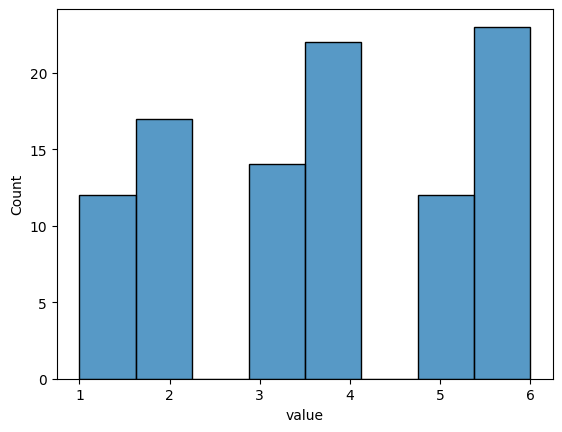

In [18]:
sns.histplot(dice_rolled_sliced,x='value')

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='value', ylabel='Count'>

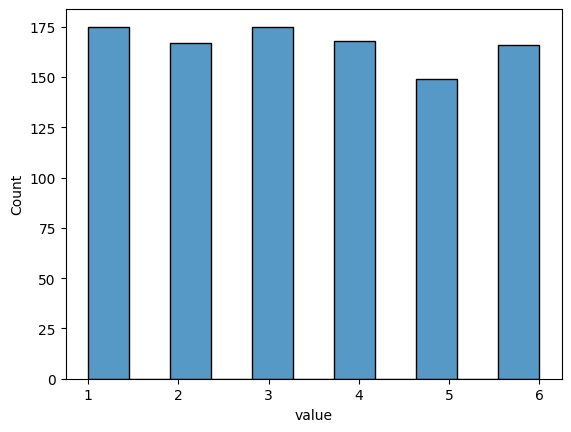

In [19]:
dice_rolled_thousand = pd.read_csv(r'D:\IronHack\labs\Discriptive Stats\Discreptive\Descriptive-Stats\data\roll_the_dice_thousand.csv')
dice_rolled_thousand.sort_values(by=['value'], inplace=True, ignore_index=True)
sns.histplot(dice_rolled_thousand,x='value')

Now it makes more sence. This graph shows that the variable needed more values to show the right distribution. As we can see the probability of each occurrance is almost the same and as we biggen the size of the observations it tends to be more equal for each bar.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [20]:
df_ages = pd.read_csv(r'D:\IronHack\labs\Discriptive Stats\Discreptive\Descriptive-Stats\data\ages_population.csv')
df_ages.sample(10)

,observation
901,30.0
670,43.0
210,16.0
600,41.0
925,26.0
245,40.0
962,39.0
601,56.0
27,41.0
543,54.0


In [45]:
df_ages.shape

(1000, 1)

In [21]:
freq_dist_age = pd.DataFrame(df_ages.value_counts())
freq_dist_age

,count
observation,
39.0,45
41.0,36
30.0,34
35.0,33
43.0,32
...,...
69.0,1
70.0,1
71.0,1


C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

<Axes: xlabel='observation', ylabel='count'>

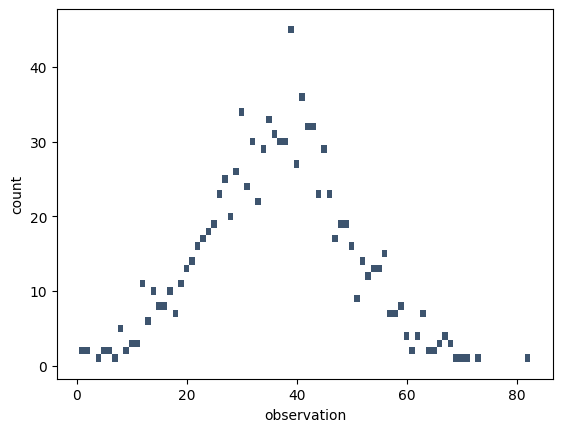

In [48]:
sns.histplot(freq_dist_age, x='observation', y='count',discrete=True)

The graph illustrates a normal dist. without any  skewness so I can tell that average should be somewhere around 35 to 40 and the std is around 10-15.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [23]:
df_ages_mean = df_ages.mean()
df_ages_mean

observation    36.56
dtype: float64

In [24]:
df_ages_std = df_ages.std()
df_ages_std

observation    12.8165
dtype: float64

Yeah, I guessed the both right.:D


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [11]:
df_ages_second = pd.read_csv(r'D:\IronHack\labs\Discriptive Stats\Discreptive\Descriptive-Stats\data\ages_population2.csv')
df_ages_second.sample(10)

,observation
619,28.0
637,20.0
22,27.0
939,26.0
651,27.0
252,22.0
81,26.0
244,29.0
809,26.0
978,30.0


In [54]:
freq_dist_age_second = pd.DataFrame(df_ages_second.value_counts())
freq_dist_age_second

,count
observation,
28.0,139
27.0,125
26.0,120
29.0,115
25.0,98
30.0,90
24.0,78
31.0,61
23.0,41


C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='observation', ylabel='Count'>

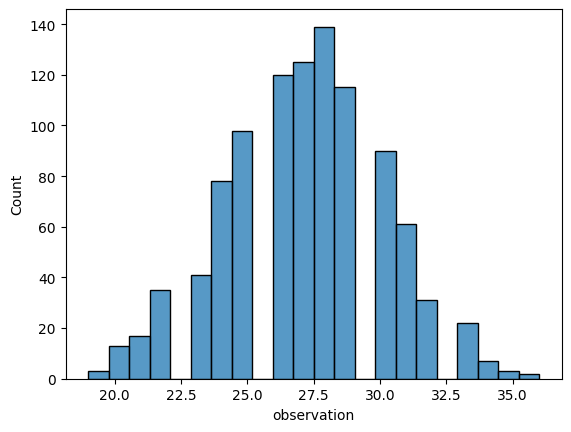

In [13]:
sns.histplot(df_ages_second, x='observation')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

For the second data set, the avarage is around 26 to 28 and the std can be around 3 to 4. The range of data in this data set is more narrow and also data is more centralized.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [56]:
df_ages_second.mean()

observation    27.155
dtype: float64

In [57]:
df_ages_second.std()

observation    2.969814
dtype: float64

The plot was pretty self explanatory so the guesses match real mean and std. With normal distributaion without considerable skewness usually, mean and std are shown in the plot.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [3]:
df_ages_third = pd.read_csv(r'D:\IronHack\labs\Discriptive Stats\Discreptive\Descriptive-Stats\data\ages_population3.csv')
df_ages_third.sample(10)

,observation
72,36.0
597,39.0
553,23.0
593,17.0
348,37.0
322,29.0
400,31.0
693,52.0
402,19.0
633,37.0


In [4]:
df_ages_third.shape

(1000, 1)

In [5]:
freq_dist_age_third = pd.DataFrame(df_ages_third.value_counts())
freq_dist_age_third

,count
observation,
32.0,37
37.0,31
35.0,31
39.0,29
36.0,26
...,...
8.0,1
7.0,1
5.0,1


C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='observation', ylabel='Count'>

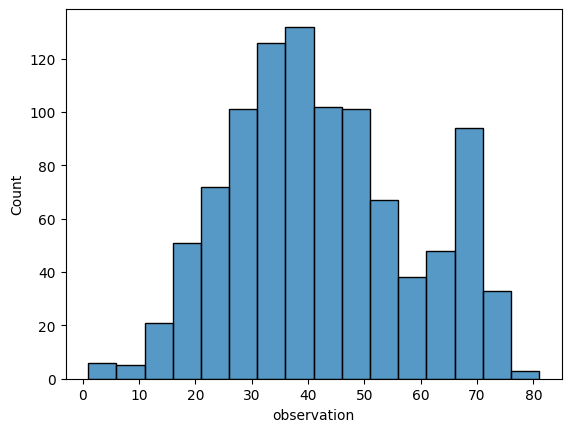

In [9]:
sns.histplot(df_ages_third, x='observation',binwidth=5)

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='observation'>

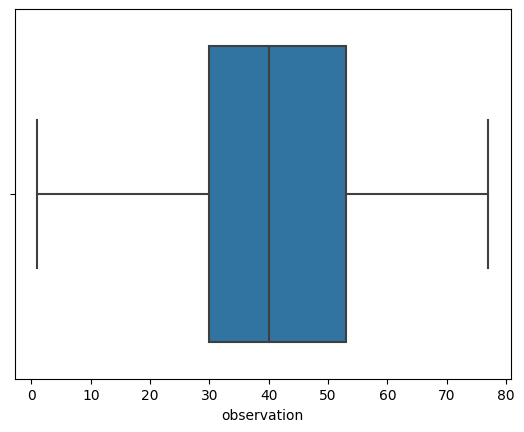

In [14]:
sns.boxplot(data=df_ages_third,x='observation')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [66]:
df_ages_third.mean()

observation    41.989
dtype: float64

In [67]:
df_ages_third.std()

observation    16.144706
dtype: float64

This time, data is more spreaded and has a normal distribution.
On the other hand, since data is distributed in a bigger range, it's reasonable to see a larger std.


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [17]:
firt_quantile = df_ages_third.quantile(.25)
firt_quantile

observation    30.0
Name: 0.25, dtype: float64

In [18]:
second_quantile = df_ages_third.quantile(.5)
second_quantile

observation    40.0
Name: 0.5, dtype: float64

In [19]:
third_quantile = df_ages_third.quantile(.75)
third_quantile

observation    53.0
Name: 0.75, dtype: float64

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [36]:
# your code here

In [37]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [38]:
# your code here

In [39]:
"""
your comments here
"""

'\nyour comments here\n'